In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from utils import config, utils

In [14]:
df, df_cv = utils.Utils.load_data(drop_neutral=False)

## Random Forrest

Test 1:
- lemmatizing: No
- Additional removal of words: No
- Remove URLs: No

In [15]:
nltk_tfidf_rf_1 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv = df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
             transformers=[
                (f'nltk_{feature}', Pipeline([
                ('compound_splitter', utils.CompoundWordSplitter()),
                ('tokenizer', utils.NLTKTokenizer(extra_stop_words=False, lemmatize=False, remove_urls=False)),
                ('tfidf', TfidfVectorizer())
            ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_tfidf_svm_1"
)

In [16]:
# nltk_rf_tfidf_1.fit(False)
# nltk_rf_tfidf_1.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.2s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   1.0s
Classification Report for nltk_tfidf_svm_1 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.76      0.89      0.82       123
     neutral       0.79      0.85      0.82       171
    positive       0.88      0.73      0.80       196

    accuracy                           0.81       490
   macro avg       0.81      0.82      0.81       490
weighted avg       0.82      0.81      0.81       490

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.39      0.14      0.20       348
     neutral       0.36      0.78      0.49       424
    positive       0.49      0.24      0.32       528

    accuracy                           0.39      1300
   macro avg       0.41      0.39      0.34      1300


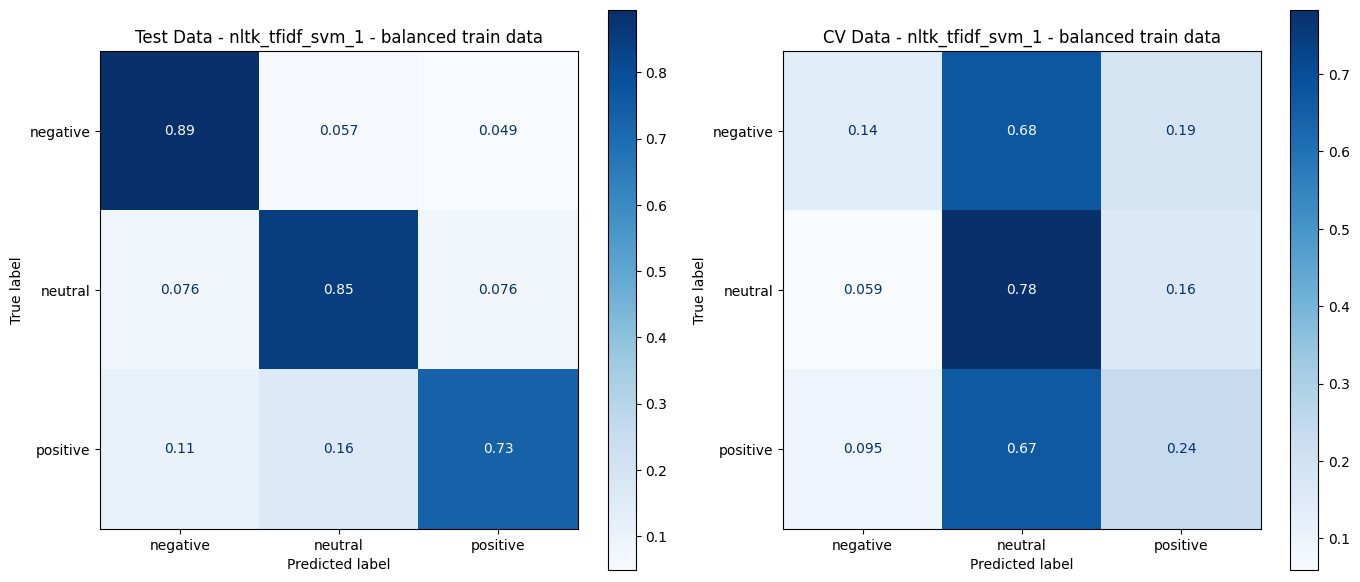

In [17]:
nltk_tfidf_rf_1.fit(True)
nltk_tfidf_rf_1.evaluate(True)

In [18]:
nltk_tfidf_rf_1.dump(config.MODEL_DIR)

Test 2:
- Lemmatizing: No
- Additional reomval of words: Yes
- Remove Urls: No

In [19]:
nltk_tfidf_rf_2 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv = df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
             transformers=[
                (f'nltk_{feature}', Pipeline([
                ('compound_splitter', utils.CompoundWordSplitter()),
                ('tokenizer', utils.NLTKTokenizer(extra_stop_words=True, lemmatize=False, remove_urls=True)),
                ('tfidf', TfidfVectorizer())
            ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_tfidf_svm_2"
)

In [20]:
# nltk_tfidf_rf_2.fit(False)
# nltk_tfidf_rf_2.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.2s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.9s
Classification Report for nltk_tfidf_svm_2 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.79      0.90      0.84       123
     neutral       0.75      0.83      0.79       171
    positive       0.89      0.72      0.80       196

    accuracy                           0.81       490
   macro avg       0.81      0.82      0.81       490
weighted avg       0.81      0.81      0.81       490

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.44      0.16      0.23       348
     neutral       0.36      0.86      0.51       424
    positive       0.58      0.17      0.27       528

    accuracy                           0.39      1300
   macro avg       0.46      0.40      0.34      1300


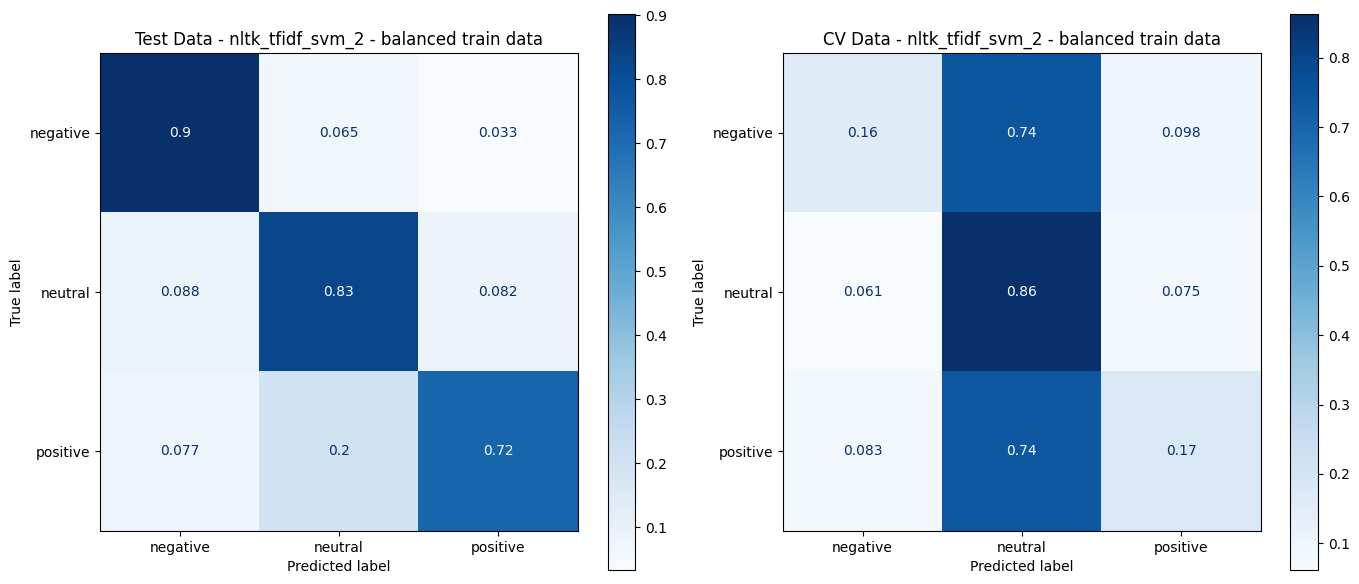

In [21]:
nltk_tfidf_rf_2.fit(True)
nltk_tfidf_rf_2.evaluate(True)

Test 3
- Lemmatizing: Yes
- Additional removal of words: Yes
- Remove URLs: Yes

In [22]:
nltk_tfidf_rf_3 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv = df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
             transformers=[
                (f'nltk_{feature}', Pipeline([
                ('compound_splitter', utils.CompoundWordSplitter()),
                ('tokenizer', utils.NLTKTokenizer(extra_stop_words=False, lemmatize=True, remove_urls=True)),
                ('tfidf', TfidfVectorizer())
            ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_tfidf_svm_3"
)

In [23]:
# nltk_tfidf_rf_3.fit(False)
# nltk_tfidf_rf_3.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   1.7s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.9s
Classification Report for nltk_tfidf_svm_3 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.77      0.85      0.81       123
     neutral       0.77      0.87      0.82       171
    positive       0.89      0.74      0.81       196

    accuracy                           0.81       490
   macro avg       0.81      0.82      0.81       490
weighted avg       0.82      0.81      0.81       490

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.40      0.18      0.24       348
     neutral       0.38      0.80      0.51       424
    positive       0.50      0.23      0.32       528

    accuracy                           0.40      1300
   macro avg       0.43      0.40      0.36      1300


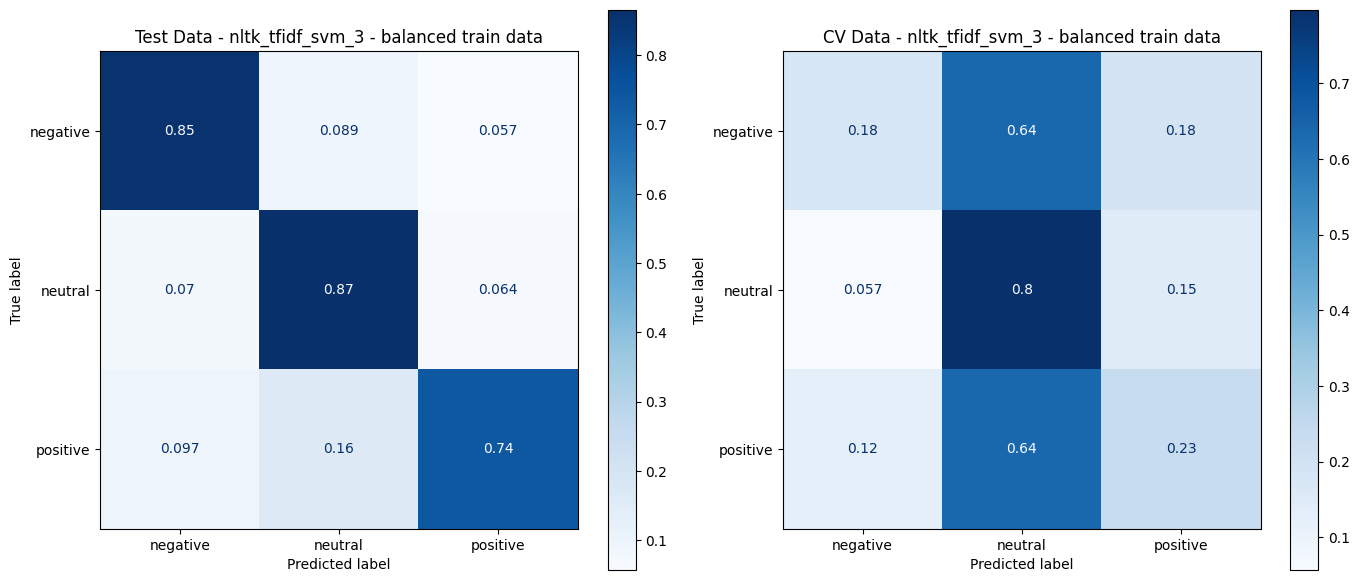

In [24]:
nltk_tfidf_rf_3.fit(True)
nltk_tfidf_rf_3.evaluate(True)

## Support Vector Machine

In [25]:
nltk_tfidf_svm_1 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv = df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
             transformers=[
                (f'nltk_{feature}', Pipeline([
                ('compound_splitter', utils.CompoundWordSplitter()),
                ('tokenizer', utils.NLTKTokenizer(extra_stop_words=False, lemmatize=False, remove_urls=False)),
                ('tfidf', TfidfVectorizer())
            ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", SVC(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_tfidf_svm_1"
)

In [26]:
# nltk_tfidf_svm_1.fit(False)
# nltk_tfidf_svm_1.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.2s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.3s
Classification Report for nltk_tfidf_svm_1 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.74      0.86      0.80       123
     neutral       0.82      0.85      0.83       171
    positive       0.89      0.76      0.82       196

    accuracy                           0.82       490
   macro avg       0.81      0.83      0.82       490
weighted avg       0.83      0.82      0.82       490

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.40      0.31      0.35       348
     neutral       0.37      0.59      0.45       424
    positive       0.49      0.32      0.39       528

    accuracy                           0.41      1300
   macro avg       0.42      0.41      0.40      1300


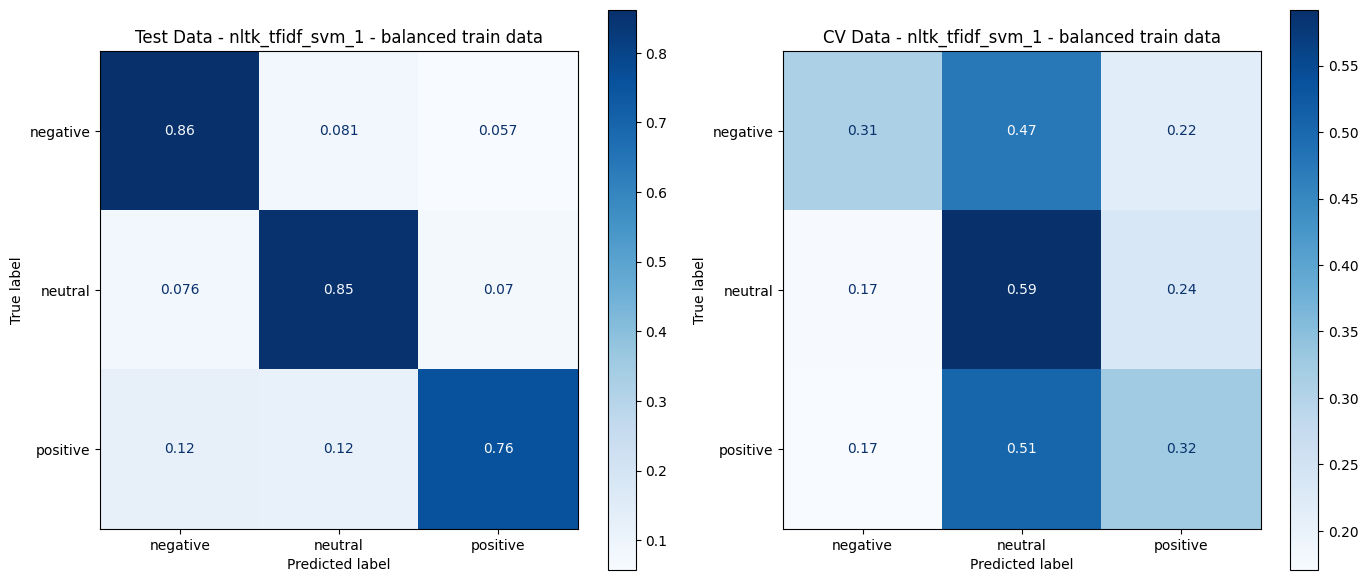

In [27]:
nltk_tfidf_svm_1.fit(True)
nltk_tfidf_svm_1.evaluate(True)

In [28]:
nltk_tfidf_svm_2 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv = df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
             transformers=[
                (f'nltk_{feature}', Pipeline([
                ('compound_splitter', utils.CompoundWordSplitter()),
                ('tokenizer', utils.NLTKTokenizer(extra_stop_words=True, lemmatize=False, remove_urls=True)),
                ('tfidf', TfidfVectorizer())
            ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", SVC(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_tfidf_svm_2"
)

In [29]:
# nltk_tfidf_svm_2.fit(False)
# nltk_tfidf_svm_2.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.2s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.3s
Classification Report for nltk_tfidf_svm_2 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.75      0.89      0.82       123
     neutral       0.83      0.85      0.84       171
    positive       0.89      0.77      0.83       196

    accuracy                           0.83       490
   macro avg       0.83      0.84      0.83       490
weighted avg       0.84      0.83      0.83       490

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.32      0.32      0.32       348
     neutral       0.36      0.58      0.44       424
    positive       0.51      0.26      0.34       528

    accuracy                           0.38      1300
   macro avg       0.39      0.38      0.37      1300


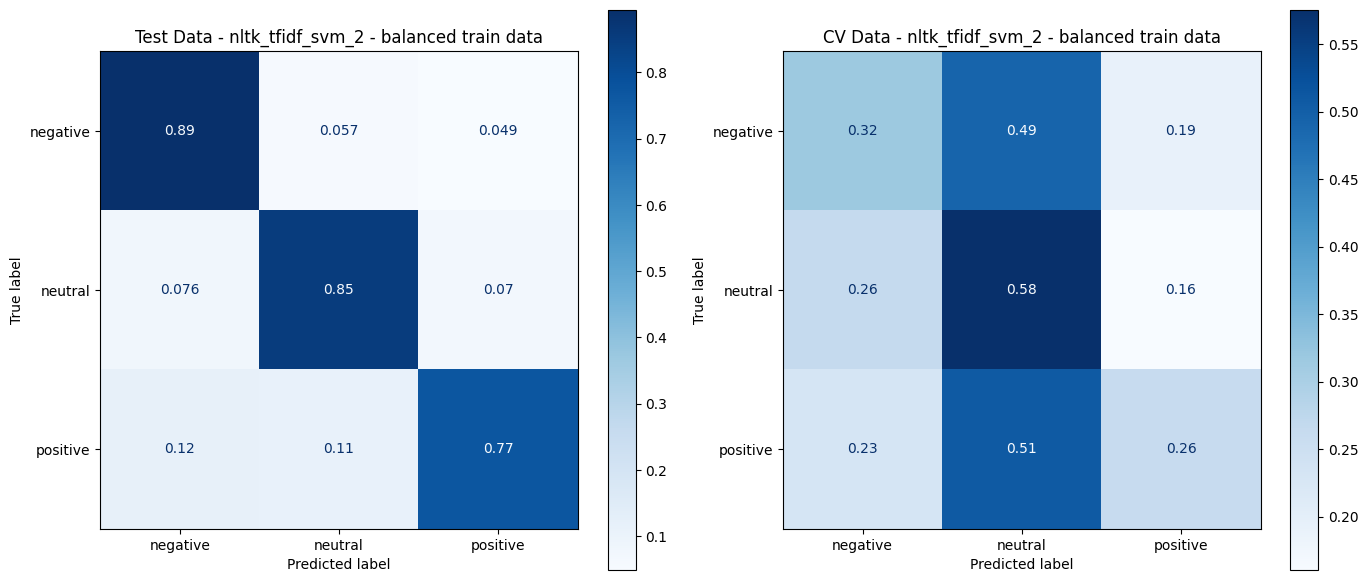

In [30]:
nltk_tfidf_svm_2.fit(True)
nltk_tfidf_svm_2.evaluate(True)

In [31]:
nltk_tfidf_svm_3 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv = df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
             transformers=[
                (f'nltk_{feature}', Pipeline([
                ('compound_splitter', utils.CompoundWordSplitter()),
                ('tokenizer', utils.NLTKTokenizer(extra_stop_words=False, lemmatize=True, remove_urls=True)),
                ('tfidf', TfidfVectorizer())
            ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", SVC(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_tfidf_svm_3"
)

In [32]:
# nltk_tfidf_svm_3.fit(False)
# nltk_tfidf_svm_3.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   1.2s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.3s
Classification Report for nltk_tfidf_svm_3 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.76      0.90      0.82       123
     neutral       0.82      0.84      0.83       171
    positive       0.91      0.78      0.84       196

    accuracy                           0.83       490
   macro avg       0.83      0.84      0.83       490
weighted avg       0.84      0.83      0.83       490

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.42      0.33      0.37       348
     neutral       0.37      0.58      0.45       424
    positive       0.51      0.34      0.41       528

    accuracy                           0.42      1300
   macro avg       0.43      0.42      0.41      1300


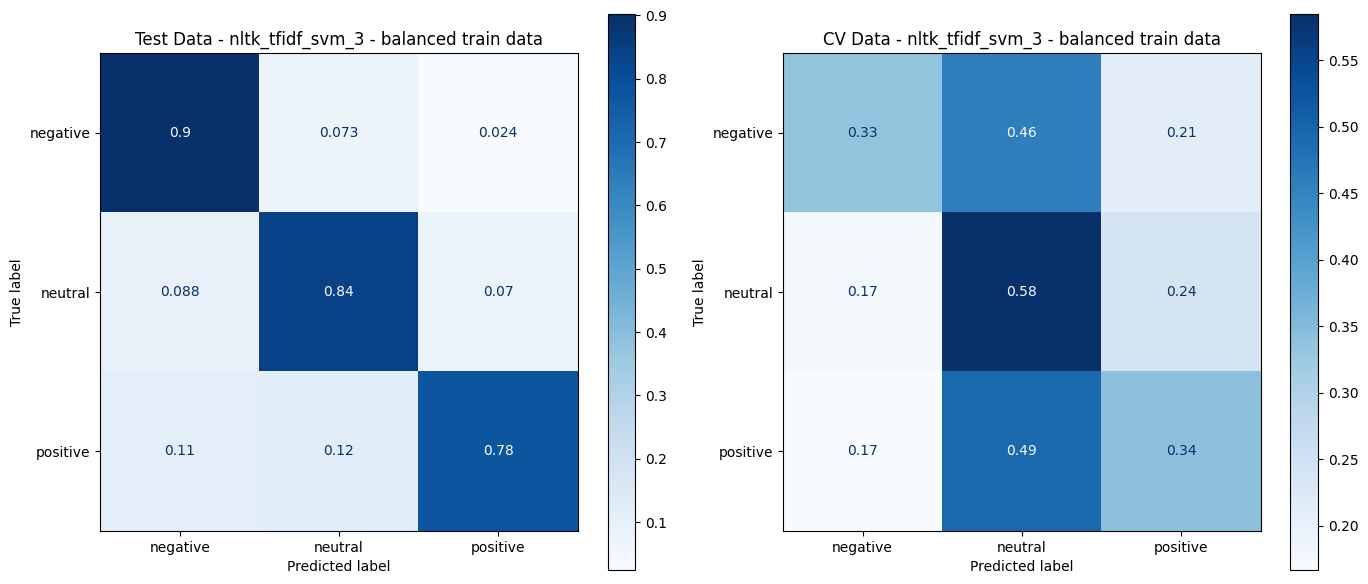

In [33]:
nltk_tfidf_svm_3.fit(True)
nltk_tfidf_svm_3.evaluate(True)